# BL40A2010 Introduction to IoT-Based Systems

## Assignment 5, 25.2.2021

### Author: Alex Beattie

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.stats import binom
style.use('bmh')
#Not to show warning messages (to keep the notebook clean)
import warnings
warnings.filterwarnings('ignore')

**(1) Create two arrays with 10000 samples generated as [Binomial](https://en.wikipedia.org/wiki/Binomial_distribution) random variables via [Numpy](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.binomial.html) similar to what we have done with Poisson random variables in the tutorial considering the following paramenters of the Binomial function:**

**(a) $n=100$ and $p=0.3$;**

**(b) $n=10000$, and $p=0.6$**

**Make the histogram (empirical) plots related to each vector and compare them with the analytical results with the probability distribution funtion given by:**

**$$\mathrm{Prob}\left[X = k \right] = \binom{n}{k}p^k(1-p)^{n-k},$$ where $k$ is the number of *successes* in $n$ trials.**

**Remember to use this [scipy.stats.binom](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.binom.html) in a similar way we did in the tutorial with Poisson.**


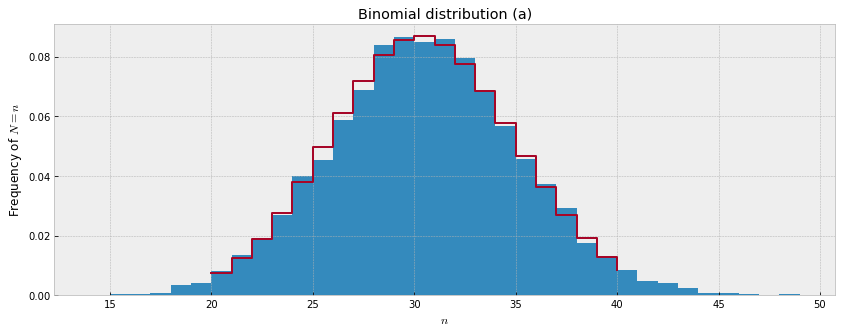

In [3]:

n_samples = 10000
n = 100
p=0.3
x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
####
samples_a = np.random.binomial(n,p,n_samples)
n_binsX = np.max(samples_a) - np.min(samples_a)
##
plt.figure(figsize=(14,5))
plt.hist(samples_a,n_binsX,density=True)
plt.step(x, binom.pmf(x,n,p), where='post')
plt.xlabel('$n$')
plt.ylabel('Frequency of $N = n$')
plt.title('Binomial distribution (a)')
plt.show()

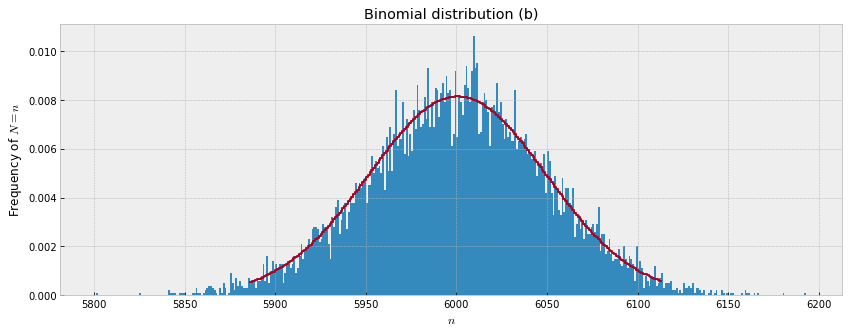

In [4]:

n_samples = 10000
n = 10000
p=0.6
x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
####
samples_a = np.random.binomial(n,p,n_samples)
n_binsX = np.max(samples_a) - np.min(samples_a)
##
plt.figure(figsize=(14,5))
plt.hist(samples_a,n_binsX,density=True)
plt.step(x, binom.pmf(x,n,p), where='post')
plt.xlabel('$n$')
plt.ylabel('Frequency of $N = n$')
plt.title('Binomial distribution (b)')
plt.show()


When n is much lower than k the empirical distribution follows fairly closely to the analytical distribution as shown by the first
graph. When n is close in size to k the empirical distribution contains spikes and valleys along the general curve
of the analytical distribution. With an n value similar to k the analytical and empirical formulations both hold the same shape
but there is a lot of variance for each specific bucket.

**(2) Read Section 2.3 and Chapter 3 from [Network Science](http://networksciencebook.com/) and generate three different kinds of Erdos-Renyi graphs with $N=15$ (fifteen nodes) using [NetworkX](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html?highlight=erdos#networkx.generators.random_graphs.erdos_renyi_graph). 
The networks shall be (a)  with probability $p=0.2$, (b) with probability $p=0.5$ and (c) with probability $p=0.8$. Discuss about the differences you see if these graphs represent communication networks.**

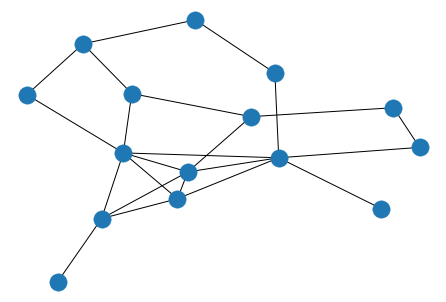

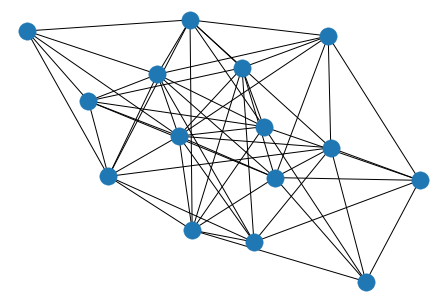

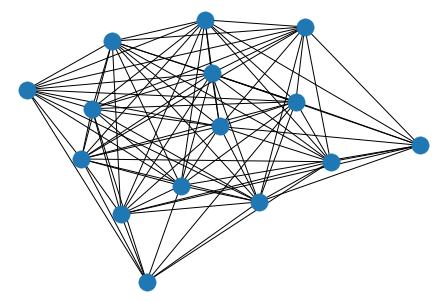

In [8]:
n = 15
p = 0.2
G = nx.erdos_renyi_graph(n, p)

nx.draw(G)
plt.show()

p = 0.5
G = nx.erdos_renyi_graph(n, p)

nx.draw(G)
plt.show()

p = 0.8
G = nx.erdos_renyi_graph(n, p)

nx.draw(G)
plt.show()

Increase the p values increases the degree of the graph. This means that each node has more edges connected
to it than the previous graph but the number of nodes remains the same. If this represents a communication network, the model
with the lowest p value can represent and physically connected LAN where computers are directly connected to one and other
and pass data through various hops on the chain. The second and third model can represent a point-to-point
network where nodes can directly communication with one and other. If these are wireless networks this could cause problems
with interference since there are so many direct node-node connections. If it is a physical network then there would need
to be a large amount of redundant cabling but it would make the network very resilient. Cutting a single edge would
not dramatically impact the network's performance. 